In [1]:
import os
import xarray as xr
import numpy as np

In [2]:
output_folder = "../../../_data/p-dengue/weather_statistics-(reanalysis-era5-land)/t2m"
os.listdir(output_folder)

['t2m_2024.grib',
 '.DS_Store',
 't2m_2019.grib',
 't2m_2023.grib',
 't2m_2015.grib',
 't2m_2022.grib',
 't2m_2018.grib',
 't2m_2021.grib',
 't2m_2017.grib',
 't2m_2016.grib',
 't2m_2020.grib']

In [67]:
ds = xr.open_dataset(
    os.path.join(output_folder, "idn_tp_2024.grib"),
    engine="cfgrib"
)

In [68]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:     (time: 367, step: 24, latitude: 190, longitude: 480)
Coordinates:
  * time        (time) datetime64[ns] 3kB 2023-12-31 2024-01-01 ... 2024-12-31
  * step        (step) timedelta64[ns] 192B 01:00:00 ... 1 days 00:00:00
  * latitude    (latitude) float64 2kB 6.992 6.892 6.792 ... -11.81 -11.91
  * longitude   (longitude) float64 4kB 94.11 94.21 94.31 ... 141.8 141.9 142.0
    number      int64 8B ...
    surface     float64 8B ...
    valid_time  (time, step) datetime64[ns] 70kB ...
Data variables:
    tp          (time, step, latitude, longitude) float32 3GB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-13T09:26 GRIB to CDM+CF via cfgrib-0.9.1...

In [69]:
ds.values

<bound method Mapping.values of <xarray.Dataset> Size: 3GB
Dimensions:     (time: 367, step: 24, latitude: 190, longitude: 480)
Coordinates:
  * time        (time) datetime64[ns] 3kB 2023-12-31 2024-01-01 ... 2024-12-31
  * step        (step) timedelta64[ns] 192B 01:00:00 ... 1 days 00:00:00
  * latitude    (latitude) float64 2kB 6.992 6.892 6.792 ... -11.81 -11.91
  * longitude   (longitude) float64 4kB 94.11 94.21 94.31 ... 141.8 141.9 142.0
    number      int64 8B ...
    surface     float64 8B ...
    valid_time  (time, step) datetime64[ns] 70kB ...
Data variables:
    tp          (time, step, latitude, longitude) float32 3GB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-13T09:26 GRIB to

In [70]:
df = ds['tp'].to_numpy()

In [71]:
df.shape

(367, 24, 190, 480)

In [72]:
np.isnan(df[365, 0, :, :]).sum()/(190*480)

np.float64(0.7884210526315789)

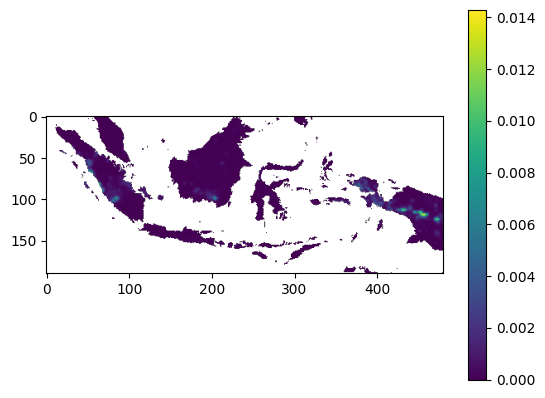

In [73]:
import matplotlib.pyplot as plt

plt.imshow(df[1, 0, :, :])
plt.colorbar()
plt.show()